# Introduction to the ChatGPT API

This notebook provides an introduction to the ChatGPT API. You will learn how to:

- Set up your environment and install the necessary packages
- Authenticate with the API using your OpenAI API key
- Execute a couple of basic examples of using the ChatGPT API

For more details on the API, refer to the [OpenAI API documentation](https://platform.openai.com/docs/api-reference/chat).

## 1. Setup and Installation

Make sure you have Python installed and then install the `openai` Python package. You can install it using pip:

In [1]:
!pip install openai pandas matplotlib tqdm ipywidgets

  Using cached openai-1.66.3-py3-none-any.whl.metadata (25 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached jiter-0.9.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycle

## 2. Setting Up Your API Key

Before you can use the ChatGPT API, you need to set your OpenAI API key. You can either set it directly in your code or store it as an environment variable. 

For security reasons, it is recommended to use environment variables or a configuration file that is not shared publicly.

In [2]:
from openai import OpenAI
from IPython.display import Markdown, display

# Set your OpenAI API Key
client = OpenAI(
    api_key="",
)

## 3. Basic Example: Getting a Response from the ChatGPT API

In this example, we will call the ChatGPT API using the `gpt-4o-mini` model. We will send a simple conversation prompt and print the result.

In [3]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Which supermarkets do I need to include in my study if I want to cover 80% of UK households?"}
    ]
)

display(Markdown(response.choices[0].message.content))

To effectively cover 80% of UK households in your study, you would want to include the major supermarkets that dominate the market. Here are the key players you should consider:

1. **Tesco**: The largest supermarket chain in the UK with a significant market share.
2. **Sainsbury's**: The second-largest supermarket chain, well-established across the UK.
3. **Asda**: A major player in the market, known for its affordability.
4. **Morrisons**: Another large supermarket chain with a strong presence.
5. **Aldi**: A discount supermarket that has rapidly gained market share in recent years.
6. **Lidl**: Similar to Aldi, it is a discount chain that holds a significant share of the market.
7. **Co-op**: The Co-operative Group operates numerous smaller stores and has a loyal customer base.

Including these supermarkets should provide a robust representation of UK households, as they account for a large percentage of grocery sales and customer reach. Additionally, you could consider including online grocery services like Ocado, as they play a significant role in the grocery shopping landscape in the UK, especially for certain demographics. 

For the most accurate and up-to-date figures regarding market share, you may want to refer to recent market research reports or industry analyses.

## 4. Data Example: Create a chart of review ratings, without AI

Our next example uses Pandas to read a CSV file of 200 reviews of Disneyland Hong Kong and create a chart displaying the count of the different rating values.

### Load the file as a data frame

And display the first 5 rows

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('disney-200-reviews.csv')

df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


### Plot the chart

Using a Pandas dataframe and Matlab plot to create a column chart of how many different rating response we got.

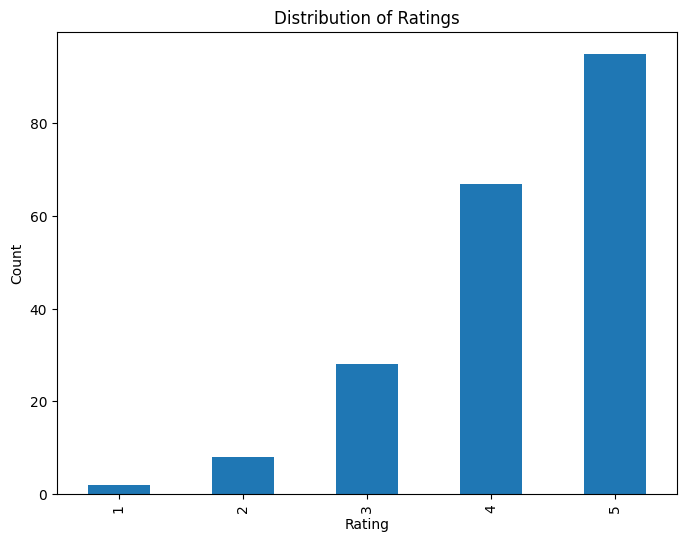

In [5]:
rating_counts = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

## 5. Involve ChatGPT

Next, we will use ChatGPT to determine the sentiment of the review text and plot the sentiment.

In [6]:
import time
from tqdm.notebook import tqdm

tqdm.pandas()

# Function to get sentiment using the ChatGPT API
def get_sentiment(review_text):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", 
                 "content": "You are a sentiment analysis assistant. Classify the sentiment of the given review as 'Positive', 'Negative', 'Mixed', or 'Neutral'. Respond with one of these four words only."},
                {"role": "user", "content": review_text}
            ],
            temperature=0  # use deterministic responses
        )
        sentiment = response.choices[0].message.content.strip()
        # Normalize the sentiment to one of the expected values
        if sentiment.lower() not in ['positive', 'negative', 'mixed', 'neutral']:
            sentiment = "Unknown"  # default to neutral if the response is unclear
        else:
            sentiment = sentiment.capitalize()
        return sentiment
    except Exception as e:
        print(f"Error processing review: {e}")
        return "Unknown"

# Apply the sentiment analysis function with a progress bar
df['Sentiment'] = df['Review_Text'].progress_apply(get_sentiment)

# Group by sentiment and count the number of reviews in each category
sentiment_counts = df['Sentiment'].value_counts().sort_index()

  0%|          | 0/200 [00:00<?, ?it/s]

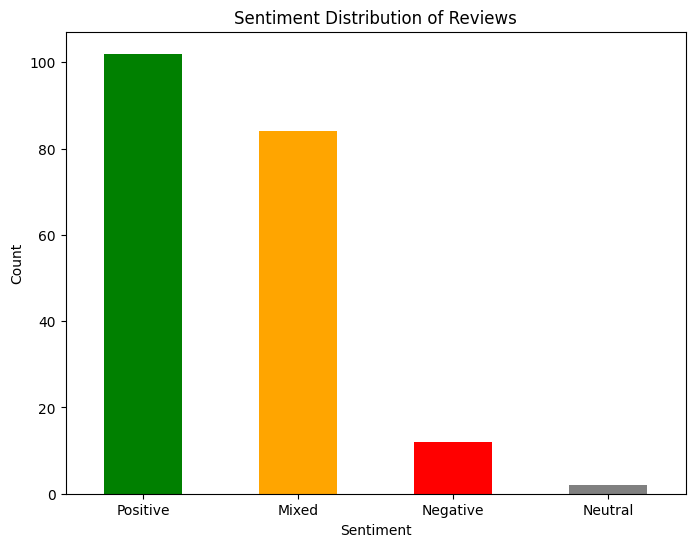

In [7]:
# Define the desired order
desired_order = ['Positive', 'Mixed', 'Negative', 'Neutral']

# Reindex the sentiment_counts Series to this order, filling missing values with 0
sentiment_counts = sentiment_counts.reindex(desired_order, fill_value=0)

color_map = {'Negative': 'red', 'Neutral': 'gray', 'Mixed': 'orange', 'Positive': 'green'}
colors = [color_map.get(sent, 'blue') for sent in sentiment_counts.index]

# Plot a column chart with different colors for each sentiment
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Reviews')
plt.xticks(rotation=0)
plt.show()

## 6. Summarization

We can use ChatGPT to read large chunks of writing and create a short summary for us.

In [8]:
# Combine all reviews into a single string separated by double newlines
reviews_text = "\n\n".join(df['Review_Text'].dropna().tolist())

# Create a prompt asking ChatGPT to summarize the reviews
prompt = (
    "Please read the following collection of reviews and provide a clear, concise summary "
    "in a few paragraphs. Highlight the main themes and overall sentiment.\n\n"
    f"{reviews_text}"
)

# Call the ChatGPT API to get the summary
response = client.chat.completions.create(
    model="o3-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that summarizes reviews."},
        {"role": "user", "content": prompt}
    ]
)

# Extract and print the summary
summary = response.choices[0].message.content.strip()
print(summary)

Overall, visitors to Hong Kong Disneyland consistently praise its charming, family-friendly atmosphere and the magic that transports guests back to childhood. Many reviewers enjoyed the park’s unique attractions—such as Mystic Manor, the Marvel-themed Iron Man and Ant Man rides, and the charming parades and live shows (especially Lion King and Mickey’s PhilharMagic). The convenience of the park’s compact layout, easy navigation, and excellent accessibility via the MTR are also frequently mentioned as key positive aspects. For families with small children, the park offers plenty of engaging rides and activities that can be comfortably experienced in a day or two.

On the other hand, several common criticisms emerged. Many visitors noted that Hong Kong Disneyland is smaller than its counterparts in the United States, Europe, and Tokyo, leading to fewer rides overall and a somewhat limited thrill factor for older guests. Some reviews expressed disappointment over undergoing renovations—su

## 7. Data Cleaning

We are going to read dirty.csv, ensure all the valued are English, flag for potential PII and check whether the answer seems valid.

### Translating

In [14]:
# Load the dirty data CSV into a DataFrame (assumes file is in the same directory)
df_dirty = pd.read_csv('dirty.csv')

# Check if the CSV contains the 'Text' column
if 'How was your visit?' not in df_dirty.columns:
    raise ValueError("The CSV file must contain a 'How was your visit?' column.")

# Define a function to translate text to English
def translate_text(text):
    if pd.isna(text) or not text.strip():
        return text
    try:
        # Translate text to English
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a helpful translation assistant. Response with only the translated message in English."},
                {"role": "user", "content": text}
            ],
            temperature=0.1,
        )
        translation = response.choices[0].message.content.strip()
        return translation
    except Exception as e:
        print(f"Error translating text: {text}\nError: {e}")
        return text

# Apply the cleaning function to the 'How was your visit?' column.
df_dirty['Translated to English'] = df_dirty['How was your visit?'].progress_apply(translate_text)

# Save the cleaned DataFrame to a new CSV file
df_dirty.to_csv('clean.csv', index=False)

print("clean.csv has been updated")

  0%|          | 0/8 [00:00<?, ?it/s]

clean.csv has been updated


### PII Risk

Populate the PII Risk cell with 'true' or 'false' depending on whether the AI thinks there could be PII in the text cell

In [13]:
# Define a function to translate text to English
def detect_pii_risk(text):
    if pd.isna(text) or not text.strip():
        return text
    try:
        # Translate text to English
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Does the following answer contain PII? Just respond \"Yes\" or \"No\"."},
                {"role": "user", "content": text}
            ],
            temperature=0.1,
        )
        pii_risk = response.choices[0].message.content.strip()
        return pii_risk != "No"
    except Exception as e:
        print(f"Error translating text: {text}\nError: {e}")
        return text

# Apply the cleaning function to the 'How was your visit?' column.
df_dirty['PII Risk'] = df_dirty['Translated to English'].progress_apply(detect_pii_risk)

# Save the cleaned DataFrame to a new CSV file
df_dirty.to_csv('clean.csv', index=False)

print("clean.csv has been updated")

  0%|          | 0/8 [00:00<?, ?it/s]

clean.csv has been updated
